In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from time import time
from syndesi.adapters import SerialPort
from syndesi.protocols import Delimited

arduino = Delimited(SerialPort('COM10', baudrate=1000000))

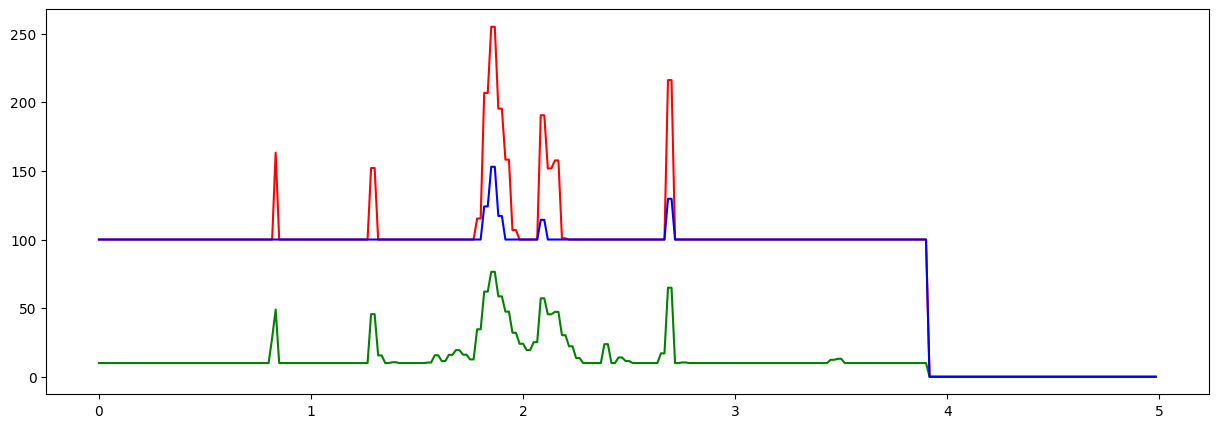

In [31]:
t = np.arange(0, 5, 1/60)

RGB = np.zeros((t.size, 3))

lightning = np.loadtxt('lightning.csv')

lightning_scaled = lightning / lightning.max() * 255

RGB[:lightning.size, 0] = np.max([lightning_scaled, np.ones_like(lightning_scaled) * 100], axis=0)
RGB[:lightning.size, 1] = np.max([lightning_scaled * 0.3, np.ones_like(lightning_scaled) * 10], axis=0)
RGB[:lightning.size, 2] = np.max([lightning_scaled * 0.6, np.ones_like(lightning_scaled) * 100], axis=0)


plt.figure(figsize=(15,5))
plt.plot(t, RGB[:, 0], 'r')
plt.plot(t, RGB[:, 1], 'g')
plt.plot(t, RGB[:, 2], 'b')

In [35]:
start = time()

for ti, RGBi in zip(t, RGB):
    while time() - start < ti:
        pass
    arduino.write(f'{RGBi[0]:.0f},{RGBi[1]:.0f},{RGBi[2]:.0f}')